In [50]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
Note: you may need to restart the kernel to use updated packages.


In [53]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_cossine_simillarity(files_analyses): 
  contents_docs = []

  for file in files_analyses:
    file_json_contents = file_get_contents("./files_parseds/" + file + ".json")
    json_data = json.loads(file_json_contents)
    content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]
    contents_docs.append(' '.join(content_pages))
  
  stop_words = ["aracaju","de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
  vectorizer = TfidfVectorizer(
      stop_words=stop_words,
      use_idf=True,
      ngram_range=(1,2),
  )
  vectorizer.fit_transform(contents_docs)

  tfidf_text1, tfidf_text2 = vectorizer.transform([contents_docs[0]]), vectorizer.transform([contents_docs[1]])

  cs_score = cosine_similarity(tfidf_text1, tfidf_text2)
      
  return np.round(cs_score[0][0],3)

In [58]:

import re

documents_to_analyses = [
  "DELEGADA DANIELLE_260000637328",
  "EDVALDO_260000983413",
  "ALEXIS PEDRÃO_260001087378",
  "MÁRCIO MACEDO_260000958767",
  "ALMEIDA LIMA_260000935642",
  "DELEGADO PAULO MARCIO_260001037485",
  "GEORLIZE_260000835177",
  "GILVANI SANTOS_260000935814",
  "JURACI NUNES_260000743434",
  "LÚCIO FLÁVIO_260000857748",
  "RODRIGO VALADARES_260001065879",
]
dict_candidates = {
  "DELEGADA DANIELLE_260000637328": "DD",
  "EDVALDO_260000983413": "EDN",
  "ALEXIS PEDRÃO_260001087378": "AP",
  "MÁRCIO MACEDO_260000958767": "MM",
  "ALMEIDA LIMA_260000935642": "AL",
  "DELEGADO PAULO MARCIO_260001037485": "DPM",
  "GEORLIZE_260000835177": "GE",
  "GILVANI SANTOS_260000935814": "GI",
  "JURACI NUNES_260000743434": "JN",
  "LÚCIO FLÁVIO_260000857748": "LF",
  "RODRIGO VALADARES_260001065879": "RV"
}
file_analyse = documents_to_analyses[6]
analyses = [[], []]
labels = []
values = []

for file_to_analyse in documents_to_analyses:
  label = dict_candidates[file_to_analyse]
  labels.append(label)
  comparer_values = []

  for file_comparer in documents_to_analyses:
    if file_comparer == file_to_analyse:
      comparer_values.append(0)
      continue
    
    score_analyse = calculate_cossine_simillarity([file_to_analyse, file_comparer])
    comparer_values.append(score_analyse)
    #print("Comparer to %s and %s" % (file_analyse, file_to_analyse))
    #print(score_analyse)
  
  values.append(comparer_values)
  
print(labels, values)


['DD', 'EDN', 'AP', 'MM', 'AL', 'DPM', 'GE', 'GI', 'JN', 'LF', 'RV'] [[0, 0.055, 0.05, 0.049, 0.041, 0.054, 0.054, 0.038, 0.035, 0.026, 0.044], [0.055, 0, 0.375, 0.385, 0.31, 0.362, 0.372, 0.239, 0.226, 0.175, 0.321], [0.05, 0.375, 0, 0.5, 0.405, 0.513, 0.526, 0.466, 0.355, 0.249, 0.386], [0.049, 0.385, 0.5, 0, 0.353, 0.504, 0.481, 0.255, 0.311, 0.195, 0.384], [0.041, 0.31, 0.405, 0.353, 0, 0.397, 0.434, 0.259, 0.255, 0.2, 0.321], [0.054, 0.362, 0.513, 0.504, 0.397, 0, 0.523, 0.265, 0.334, 0.235, 0.38], [0.054, 0.372, 0.526, 0.481, 0.434, 0.523, 0, 0.327, 0.33, 0.254, 0.393], [0.038, 0.239, 0.466, 0.255, 0.259, 0.265, 0.327, 0, 0.203, 0.169, 0.27], [0.035, 0.226, 0.355, 0.311, 0.255, 0.334, 0.33, 0.203, 0, 0.154, 0.308], [0.026, 0.175, 0.249, 0.195, 0.2, 0.235, 0.254, 0.169, 0.154, 0, 0.203], [0.044, 0.321, 0.386, 0.384, 0.321, 0.38, 0.393, 0.27, 0.308, 0.203, 0]]


In [65]:
import numpy as np
import matplotlib.pyplot as plt

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''

    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='OrRd', vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(40, 20))

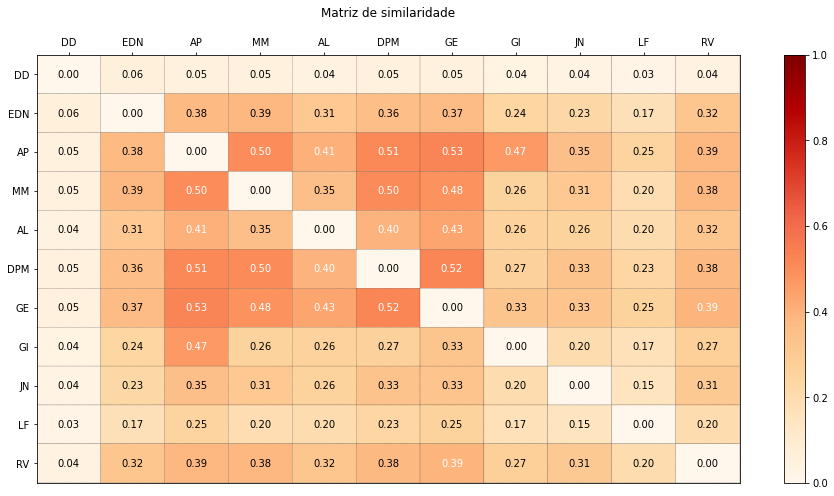

In [68]:
title = "Matriz de similaridade\n"
xlabel= ''#"Labels"
ylabel= ''#"Labels"
xticklabels = labels
yticklabels = labels
heatmap(np.array(values), title, xlabel, ylabel, xticklabels, yticklabels)